# Comparison of the Eaton and Palisades Fires
***
#### Author: William Mullins

#### [View Repository on Github](https://github.com/willrmull/eds220-hwk4)

## About 
***


Geo Data
Taken from
https://data.lacounty.gov/maps/ad51845ea5fb4eb483bc2a7c38b2370c/about

If you have an annotation you don't need to add a legend

In [1]:
# Load necessary libraries
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rioxr


# Import the Landsat 8 data
fp = os.path.join('data','landsat8-2025-02-23-palisades-eaton.nc') 
landsat = xr.open_dataset(fp)

In [2]:
# View the data variables in the dataset
print(landsat.variables)
print(landsat.data_vars)

Frozen({'y': <xarray.IndexVariable 'y' (y: 1418)> Size: 11kB
array([3799050., 3799020., 3798990., ..., 3756600., 3756570., 3756540.])
Attributes:
    units:          metre
    resolution:     -30.0
    crs:            EPSG:32611
    axis:           Y
    long_name:      y coordinate of projection
    standard_name:  projection_y_coordinate, 'x': <xarray.IndexVariable 'x' (x: 2742)> Size: 22kB
array([334410., 334440., 334470., ..., 416580., 416610., 416640.])
Attributes:
    units:          metre
    resolution:     30.0
    crs:            EPSG:32611
    axis:           X
    long_name:      x coordinate of projection
    standard_name:  projection_x_coordinate, 'time': <xarray.Variable ()> Size: 8B
[1 values with dtype=datetime64[ns]], 'red': <xarray.Variable (y: 1418, x: 2742)> Size: 16MB
[3888156 values with dtype=float32]
Attributes:
    grid_mapping:  spatial_ref, 'green': <xarray.Variable (y: 1418, x: 2742)> Size: 16MB
[3888156 values with dtype=float32]
Attributes:
    grid_mapp

In [3]:
# Check the coordinate reference system (CRS) of the landsat data
print(landsat.rio.crs)

None


In [4]:
# Recover geometry information using CRS from the spatial_ref attribute
landsat.rio.write_crs(landsat.spatial_ref.crs_wkt, inplace=True)
print(landsat.rio.crs)

EPSG:32611


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


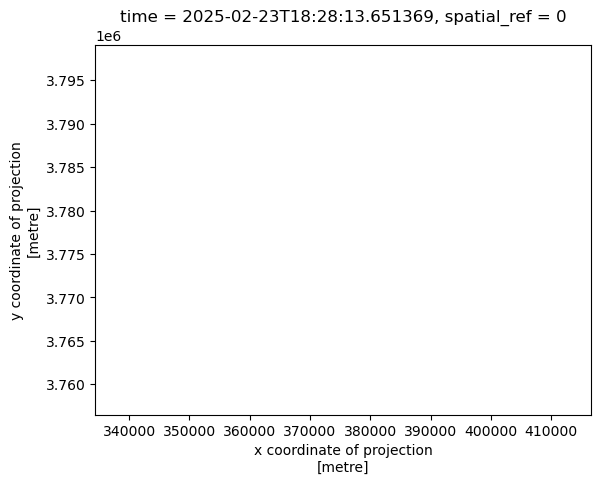

In [6]:
landsat[['red', 'green', 'blue']].to_array(dim='band').plot.imshow()

In [7]:
# Find Bands With NA Values
landsat_array = landsat[['red', 'green', 'blue']].to_array(dim='band') 
print(np.isnan(landsat_array).sum())

<xarray.DataArray ()> Size: 8B
array(110)
Coordinates:
    time         datetime64[ns] 8B ...
    spatial_ref  int64 8B 0


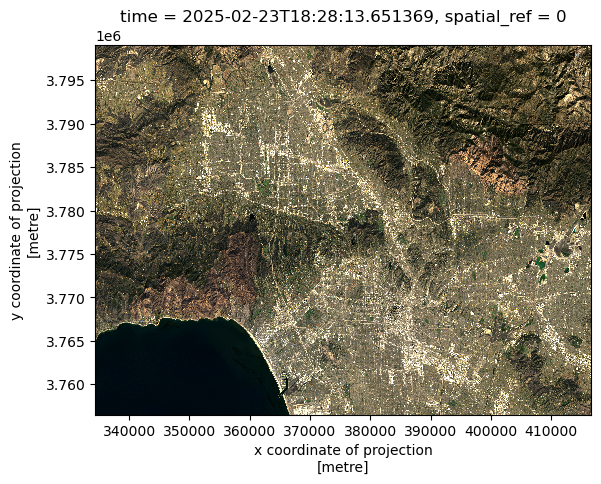

In [8]:
# Fill NaN values with 0 and Re-plot the image
landsat_filled = landsat_array.fillna(0)
landsat_filled.plot.imshow(robust=True)

#### Plot Discussion
The initial visualization was unable to render the true colors on th emap due to large outliers skewing the data distribution. In the second plot, the data was adjusted using robust scaling allowing the true colors to be seen. This gives a more accurate depiction of what the region looks like. 

## False Color Image
***

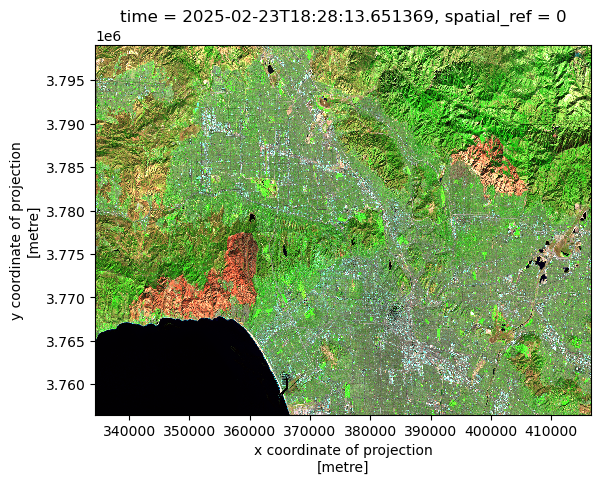

In [47]:
# Plot with Short-wave Infrared, Near-Infrared, and Red 
landsat[['swir22', 'nir08', 'red']].to_array(dim='band').fillna(0).plot.imshow(robust=True)

## Map
***

In [48]:
# False Color Map With Fire Perimeters

# Load in Palisades and Eaton Data
palisades, eaton  = (
    gpd.read_file(os.path.join("data", "Palisades_Perimeter_20250121.geojson")),
    gpd.read_file(os.path.join("data", "Eaton_Perimeter_20250121.geojson"))
)

# Match the CRS
landsat_reproj = landsat.rio.reproject(eaton.crs)

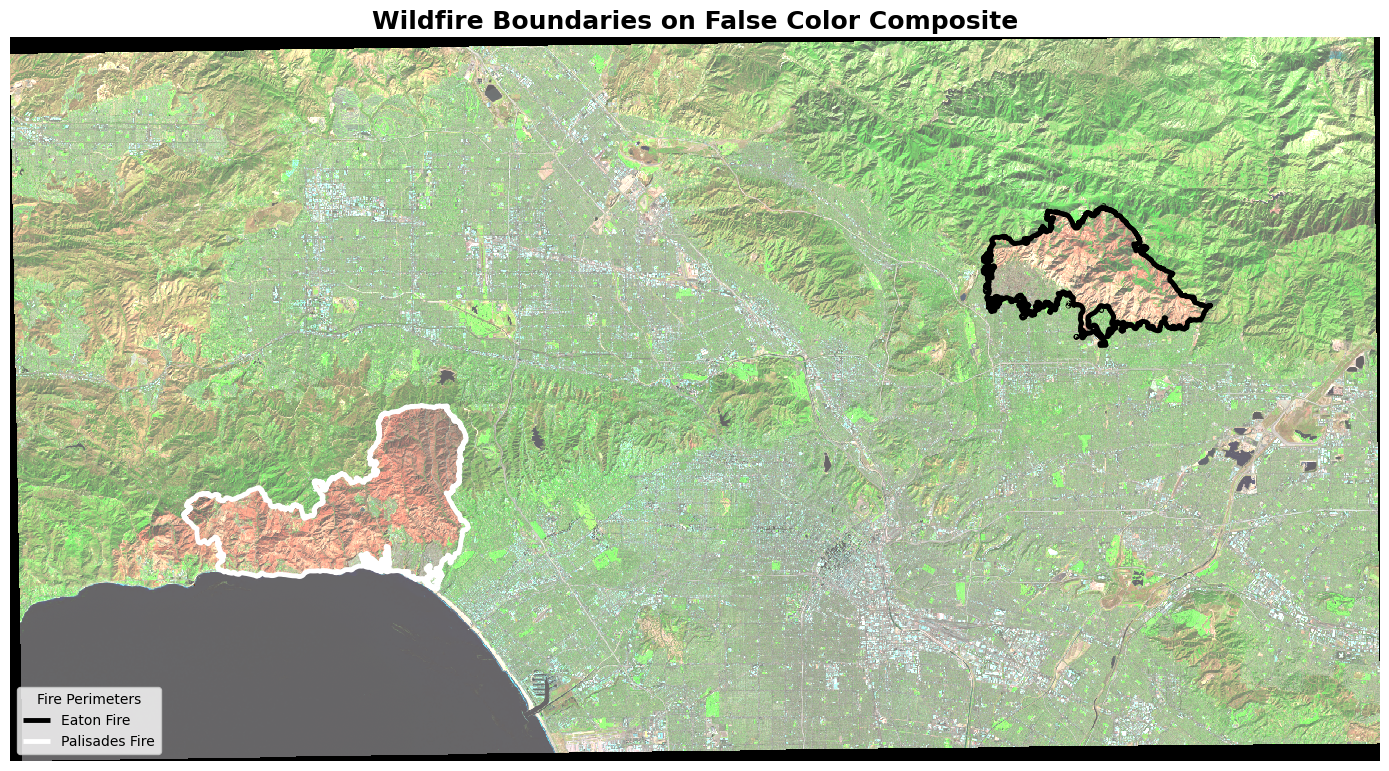

In [46]:
# Plotting Data Together 

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

# Plot False Color Map
landsat_reproj[['swir22', 'nir08', 'red']].to_array(dim='band').fillna(0).plot.imshow(ax=ax, robust=True)

# Plot Eaton And Palisades Perimeter
eaton.boundary.plot(ax=ax, 
                    color='Black', 
                    linewidth= 3.5, 
                    label='Eaton Fire')
palisades.boundary.plot(ax=ax, 
                        color='White', 
                        linewidth = 3.5, 
                        label='Palisades Fire')

# Add Title
ax.set_title("Wildfire Boundaries on False Color Composite", fontsize=18, fontweight='bold')

# Add Legend
ax.legend(loc='lower left', frameon=True, title="Fire Perimeters")

ax.axis('off')
plt.tight_layout()
plt.show()

### Discription:
The figure shows the fire boundaries of the **Palisades** and **Eaton** fires on top of a shortwave infrared, near-infrared, and red false color composite of the area.
This composite allows for differentiation of features: burned areas (orange or tan), healthy vegetation (green), and active fire (red).
